<a href="https://colab.research.google.com/github/manishramamoorthy/New-Machine-Learning-Projects/blob/main/Project_9_Diabetes_Classification_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Summary :**

1) Importing Libraries                    
2) Loading Dataset                           
3) Data PreProcessing                                 
4) EDA (Exploratory Data Analysis)                             
5) Train and Test Split                      
6) Standard Scaler                           
7) Modelling                           
8) Making Prediction                               
9) Compare Actual and Predicted Scores                        
10) Evaluation Metrics                            

**1) Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import sklearn.datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,plot_roc_curve,roc_curve,roc_auc_score,confusion_matrix,f1_score

**2) Loading Dataset**

In [3]:
diabetes_data = pd.read_csv("/content/diabetes.csv")

**3) Data PreProcessing**

1) Top Five Rows of DataSet

In [4]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


2) Last Five Rows of DataSet

In [5]:
diabetes_data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


3) Shape of DataSet

In [6]:
diabetes_data.shape
print("Number of Rows: ",diabetes_data.shape[0])
print("Number of Columns: ",diabetes_data.shape[1])

Number of Rows:  768
Number of Columns:  9


4) data Types

In [7]:
diabetes_data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

5) Getting Information of DataSet

In [8]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


6) Checking Missing Values of DataSet

In [9]:
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

7) Droping Duplicates Values of Dataset

In [10]:
diabetes_data = diabetes_data.drop_duplicates()

8) Statistical Measures

In [11]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


9) IQR (Inter Quantile Range)

    IQR = Q3-Q1           
    Upper Threshold = Q3 + (1.5 * IQR)
    Lower Threshold = Q1 - (1.5 * IQR) 

Glucose

In [12]:
IQR = diabetes_data.Glucose.quantile(0.75) - diabetes_data.Glucose.quantile(0.25)
Upper_Threshold = diabetes_data.Glucose.quantile(0.75) + (1.5 * IQR)
Lower_Threshold = diabetes_data.Glucose.quantile(0.25) - (1.5 * IQR)
print("Upper_Threshold : ",Upper_Threshold)
print("Lower_Threshold : ",Lower_Threshold)

Upper_Threshold :  202.125
Lower_Threshold :  37.125


BloodPressure

In [13]:
IQR = diabetes_data.BloodPressure.quantile(0.75) - diabetes_data.BloodPressure.quantile(0.25)
Upper_Threshold = diabetes_data.BloodPressure.quantile(0.75) + (1.5 * IQR)
Lower_Threshold = diabetes_data.BloodPressure.quantile(0.25) - (1.5 * IQR)
print("Upper_Threshold : ",Upper_Threshold)
print("Lower_Threshold : ",Lower_Threshold)

Upper_Threshold :  107.0
Lower_Threshold :  35.0


Pregnancies

In [14]:
IQR = diabetes_data.Pregnancies.quantile(0.75) - diabetes_data.Pregnancies.quantile(0.25)
Upper_Threshold = diabetes_data.Pregnancies.quantile(0.75) + (1.5 * IQR)
Lower_Threshold = diabetes_data.Pregnancies.quantile(0.25) - (1.5 * IQR)
print("Upper_Threshold : ",Upper_Threshold)
print("Lower_Threshold : ",Lower_Threshold)

Upper_Threshold :  13.5
Lower_Threshold :  -6.5


SkinThickness

In [15]:
IQR = diabetes_data.SkinThickness.quantile(0.75) - diabetes_data.SkinThickness.quantile(0.25)
Upper_Threshold = diabetes_data.SkinThickness.quantile(0.75) + (1.5 * IQR)
Lower_Threshold = diabetes_data.SkinThickness.quantile(0.25) - (1.5 * IQR)
print("Upper_Threshold : ",Upper_Threshold)
print("Lower_Threshold : ",Lower_Threshold)

Upper_Threshold :  80.0
Lower_Threshold :  -48.0


Insulin	

In [16]:
IQR = diabetes_data.Insulin.quantile(0.75) - diabetes_data.Insulin.quantile(0.25)
Upper_Threshold = diabetes_data.Insulin.quantile(0.75) + (1.5 * IQR)
Lower_Threshold = diabetes_data.Insulin.quantile(0.25) - (1.5 * IQR)
print("Upper_Threshold : ",Upper_Threshold)
print("Lower_Threshold : ",Lower_Threshold)

Upper_Threshold :  318.125
Lower_Threshold :  -190.875


BMI

In [17]:
IQR = diabetes_data.BMI.quantile(0.75) - diabetes_data.BMI.quantile(0.25)
Upper_Threshold = diabetes_data.BMI.quantile(0.75) + (1.5 * IQR)
Lower_Threshold = diabetes_data.BMI.quantile(0.25) - (1.5 * IQR)
print("Upper_Threshold : ",Upper_Threshold)
print("Lower_Threshold : ",Lower_Threshold)

Upper_Threshold :  50.550000000000004
Lower_Threshold :  13.35


Diabetes Pedigree Function	

In [18]:
IQR = diabetes_data.DiabetesPedigreeFunction.quantile(0.75) - diabetes_data.DiabetesPedigreeFunction.quantile(0.25)
Upper_Threshold = diabetes_data.DiabetesPedigreeFunction.quantile(0.75) + (1.5 * IQR)
Lower_Threshold = diabetes_data.DiabetesPedigreeFunction.quantile(0.25) - (1.5 * IQR)
print("Upper_Threshold : ",Upper_Threshold)
print("Lower_Threshold : ",Lower_Threshold)

Upper_Threshold :  1.2
Lower_Threshold :  -0.32999999999999996


Age

In [19]:
IQR = diabetes_data.Age.quantile(0.75) - diabetes_data.Age.quantile(0.25)
Upper_Threshold = diabetes_data.Age.quantile(0.75) + (1.5 * IQR)
Lower_Threshold = diabetes_data.Age.quantile(0.25) - (1.5 * IQR)
print("Upper_Threshold : ",Upper_Threshold)
print("Lower_Threshold : ",Lower_Threshold)

Upper_Threshold :  66.5
Lower_Threshold :  -1.5


10) Checking balanced DataSet or Imbalanced DataSet

In [20]:
diabetes_data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

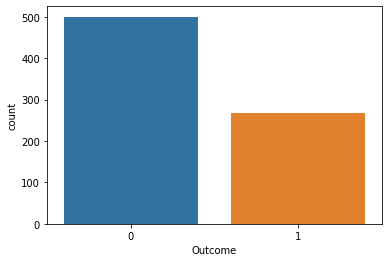

In [21]:
sns.countplot(x="Outcome",data = diabetes_data)

It Is Balanced DataSet

**4) EDA (Exploratory Data Analysis)**

In [22]:
diabetes_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

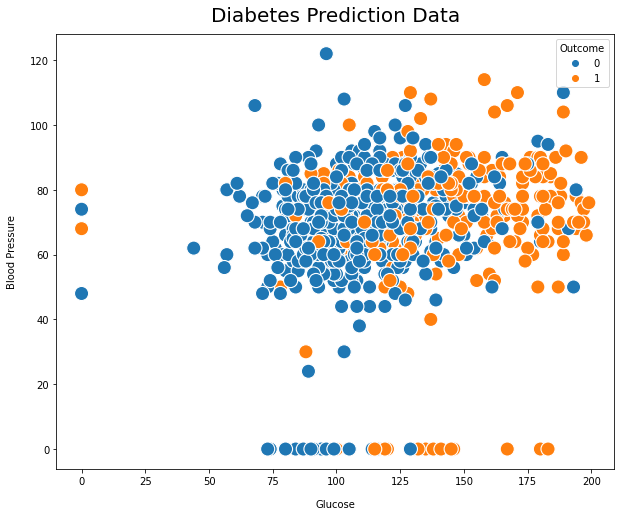

In [31]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="Glucose",y="BloodPressure",hue="Outcome",data=diabetes_data,s=200)
plt.title("Diabetes Prediction Data",y=1.015,fontsize=20)
plt.xlabel("Glucose",labelpad = 13)
plt.ylabel("Blood Pressure",labelpad = 13)
ax = plt.gca()

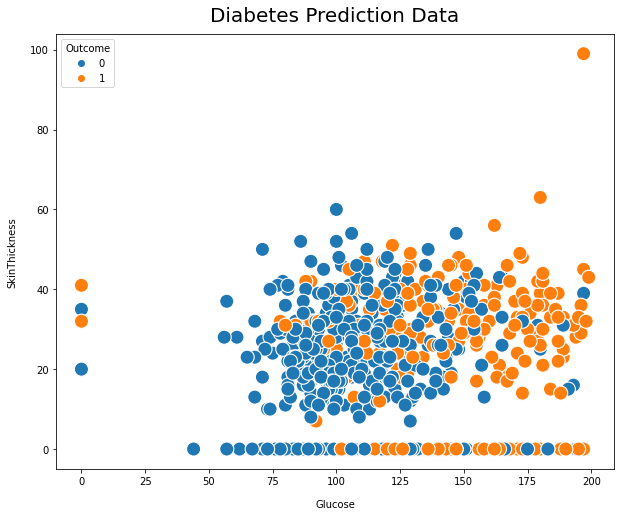

In [35]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="Glucose",y="SkinThickness",hue="Outcome",data=diabetes_data,s=200)
plt.title("Diabetes Prediction Data",y=1.015,fontsize=20)
plt.xlabel("Glucose",labelpad = 13)
plt.ylabel("SkinThickness",labelpad = 13)
ax = plt.gca()

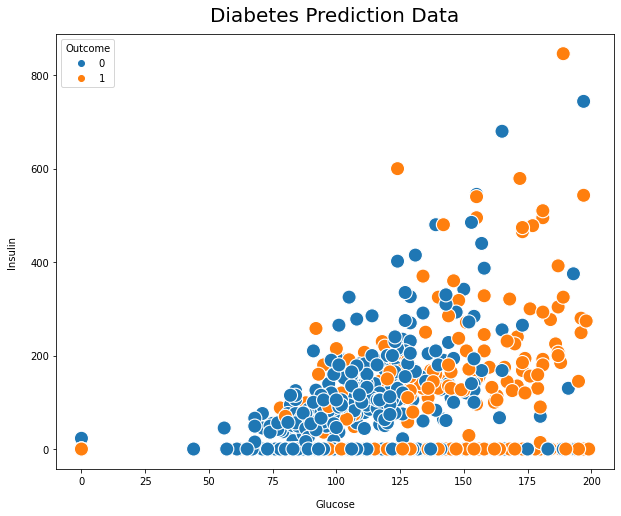

In [36]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="Glucose",y="Insulin",hue="Outcome",data=diabetes_data,s=200)
plt.title("Diabetes Prediction Data",y=1.015,fontsize=20)
plt.xlabel("Glucose",labelpad = 13)
plt.ylabel("Insulin",labelpad = 13)
ax = plt.gca()

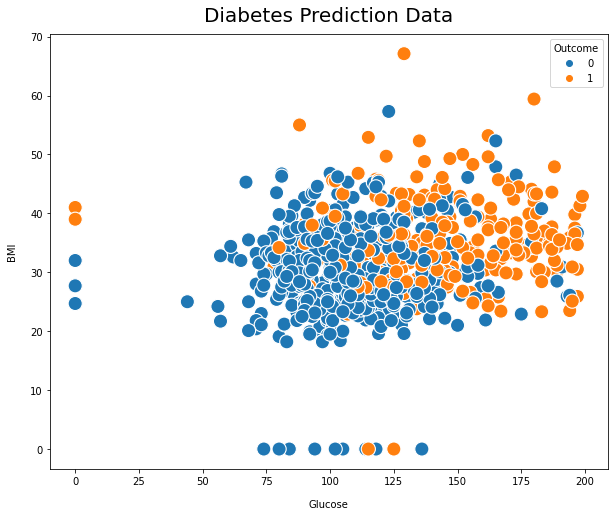

In [38]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="Glucose",y="BMI",hue="Outcome",data=diabetes_data,s=200)
plt.title("Diabetes Prediction Data",y=1.015,fontsize=20)
plt.xlabel("Glucose",labelpad = 13)
plt.ylabel("BMI",labelpad = 13)
ax = plt.gca()

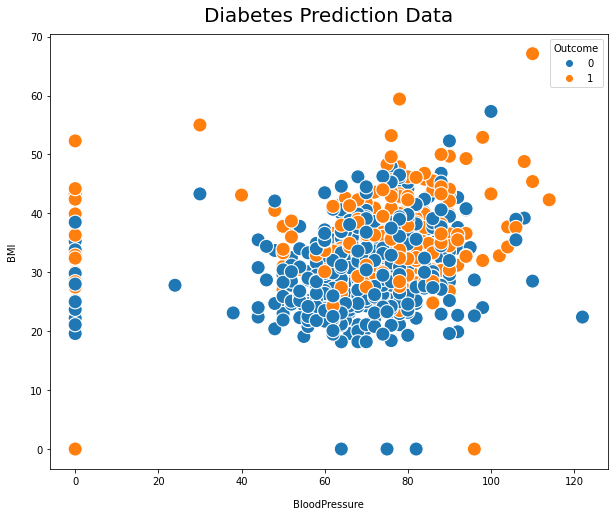

In [41]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="BloodPressure",y="BMI",hue="Outcome",data=diabetes_data,s=200)
plt.title("Diabetes Prediction Data",y=1.015,fontsize=20)
plt.xlabel("BloodPressure",labelpad = 13)
plt.ylabel("BMI",labelpad = 13)
ax = plt.gca()

**5) Train and Test Split**

In [43]:
X = diabetes_data.drop(columns = "Outcome",axis = 1)
y = diabetes_data["Outcome"]

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify=y,random_state=7)

**6) Standard Scaler**

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[ 1.20856701,  2.3928978 ,  0.25805437, ..., -0.83663601,
         2.04087421,  0.51608431],
       [ 1.20856701,  0.38484425,  0.15461713, ...,  0.07593437,
        -0.60968264,  0.51608431],
       [-1.13433446, -0.43092751,  0.36149161, ...,  1.6924876 ,
         0.58752871, -0.79653518],
       ...,
       [-0.84147177, -0.43092751, -0.05225736, ..., -0.75841569,
        -0.91186338, -0.79653518],
       [ 0.03711628,  0.79273013,  1.18898954, ..., -0.14568987,
         0.16447566,  2.44125956],
       [-1.13433446,  0.5103476 , -0.05225736, ..., -0.98003993,
        -0.97517745, -1.05905908]])

**7) Modelling**

1) Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train,y_train)

LogisticRegression()

2) SVC (Support Vector Classifier)

In [47]:
from sklearn import svm
svm = svm.SVC(kernel="linear")
svm.fit(X_train,y_train)

SVC(kernel='linear')

3) KNN Classification

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

**8) Making Prediction**

1) Logistic Regression

In [49]:
logistic.coef_

array([[ 1.51392813e-01,  2.68376716e-02, -2.17817701e-02,
        -2.19789393e-03, -6.58864428e-06,  6.06376737e-02,
         1.65571317e+00,  9.59065010e-03]])

In [50]:
logistic.intercept_

array([-6.16992536])

In [52]:
logistic.predict([[1,148,66,29,94,28.1,0.672,50]])

array([0])

2) SVC (Support Vector Classifier)

In [53]:
svm.coef_

array([[ 1.23373871e-01,  2.67878634e-02, -1.15378211e-02,
        -2.29179380e-03,  4.98043868e-04,  5.32194358e-02,
         7.93683802e-01, -2.89038082e-03]])

In [54]:
svm.intercept_

array([-5.6051925])

In [55]:
svm.predict([[1,148,66,29,94,28.1,0.672,50]])

array([0])

3) KNN Classification

In [57]:
knn.predict([[1,148,66,29,94,28.1,0.672,50]])

array([1])

**9) Compare Actual and Predicted Scores**

1) Logistic Regression

In [58]:
y_pred_1 = logistic.predict(X_test)
y_pred_1

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [61]:
df = pd.DataFrame({"Actual": y_test,"Prediction" :y_pred_1})
df

,Actual,Prediction
408,1,1
61,1,0
531,0,0
515,1,0
595,1,1
...,...,...
284,1,0
475,0,0
89,0,0
115,1,0


2) SVC (Support Vector Classifier)

In [59]:
y_pred_2 = svm.predict(X_test)
y_pred_2

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [63]:
df = pd.DataFrame({"Actual": y_test,"Prediction" :y_pred_2})
df

,Actual,Prediction
408,1,1
61,1,0
531,0,0
515,1,1
595,1,1
...,...,...
284,1,0
475,0,0
89,0,0
115,1,0


3) KNN Classification

In [60]:
y_pred_3 = knn.predict(X_test)
y_pred_3

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [64]:
df = pd.DataFrame({"Actual": y_test,"Prediction" :y_pred_3})
df

,Actual,Prediction
408,1,1
61,1,0
531,0,0
515,1,0
595,1,1
...,...,...
284,1,0
475,0,0
89,0,0
115,1,0


**10) Evaluation Metrics**

In [65]:
from sklearn.metrics import accuracy_score,plot_roc_curve,roc_curve,roc_auc_score,confusion_matrix,f1_score

1) Logistic Regression

In [70]:
# Accuracy Score
Accuracy_Score = logistic.score(X_test,y_test)
print("Accuarcy Score of a Test Data: ",Accuracy_Score)

Accuarcy Score of a Test Data:  0.75


In [71]:
# Confusion Matrix
confusion_matrix(y_test,y_pred_1)

array([[111,  14],
       [ 34,  33]])

In [72]:
# f1 score
F1_Score = f1_score(y_test,y_pred_1)
print("f1 Score of Test Data: ",F1_Score)

f1 Score of Test Data:  0.5789473684210525


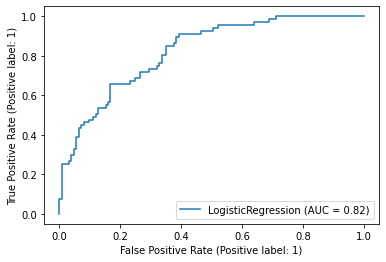

In [73]:
# AUROC Score
plot_roc_curve(logistic,X_test,y_test)

2) SVC (Support Vector Classifier)

In [74]:
# Accuracy Score
Accuracy_Score = svm.score(X_test,y_test)
print("Accuarcy Score of a Test Data: ",Accuracy_Score)

Accuarcy Score of a Test Data:  0.7864583333333334


In [75]:
# Confusion Matrix
confusion_matrix(y_test,y_pred_2)

array([[112,  13],
       [ 28,  39]])

In [76]:
# f1 score
F1_Score = f1_score(y_test,y_pred_2)
print("f1 Score of Test Data: ",F1_Score)

f1 Score of Test Data:  0.6554621848739495


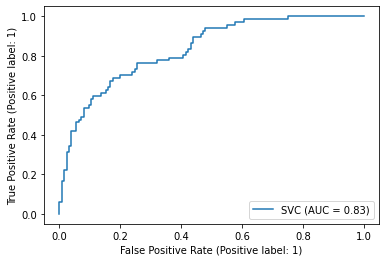

In [77]:
# AUROC Score
plot_roc_curve(svm,X_test,y_test)

3) KNN Classification

In [78]:
# Accuracy Score
Accuracy_Score = knn.score(X_test,y_test)
print("Accuarcy Score of a Test Data: ",Accuracy_Score)

Accuarcy Score of a Test Data:  0.7395833333333334


In [79]:
# Confusion Matrix
confusion_matrix(y_test,y_pred_3)

array([[104,  21],
       [ 29,  38]])

In [80]:
# f1 score
F1_Score = f1_score(y_test,y_pred_3)
print("f1 Score of Test Data: ",F1_Score)

f1 Score of Test Data:  0.6031746031746031


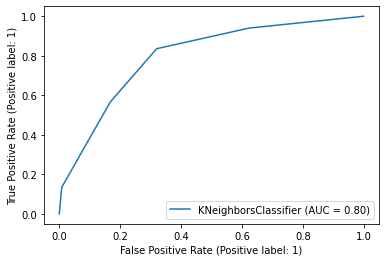

In [81]:
# AUROC Score
plot_roc_curve(knn,X_test,y_test)